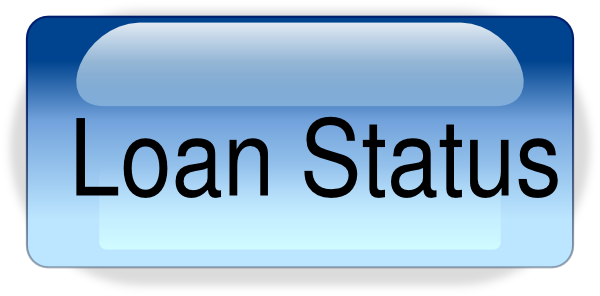

## Importing Library 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
le  =LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from sklearn import tree

## Loading Data 

In [2]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

## Understanding Data

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape 
## Inference--
    # There are total 614 rows and 13 columns. 

(614, 13)

In [5]:
for i in df:
    print("The data type of {} is {} and it contains {} unique value ".format(i,df.dtypes[i],df[i].nunique()))
    print(end="\n\n")
    
## Inference -- 
    #1. data type of Credit history is in float but it has to be in object as it contain only 2 unique value. 
    #2 . Loan_ID is of no use as it is different for each rows so will be  not making any impact on the target variable i.e (Loan_Status)
    

The data type of Loan_ID is object and it contains 614 unique value 


The data type of Gender is object and it contains 2 unique value 


The data type of Married is object and it contains 2 unique value 


The data type of Dependents is object and it contains 4 unique value 


The data type of Education is object and it contains 2 unique value 


The data type of Self_Employed is object and it contains 2 unique value 


The data type of ApplicantIncome is int64 and it contains 505 unique value 


The data type of CoapplicantIncome is float64 and it contains 287 unique value 


The data type of LoanAmount is float64 and it contains 203 unique value 


The data type of Loan_Amount_Term is float64 and it contains 10 unique value 


The data type of Credit_History is float64 and it contains 2 unique value 


The data type of Property_Area is object and it contains 3 unique value 


The data type of Loan_Status is object and it contains 2 unique value 




In [6]:
# Changing Datatype of Credit_History-
df["Credit_History"] = df["Credit_History"].astype("object")

In [7]:
# Removig Loan_id as it is not important
df.drop("Loan_ID",axis=1,inplace=True)

In [8]:
# Checking null values in the dataset 
display(df.isna().any(),df.isnull().sum())
print(end="\n\n")
print(round(sum(df.isnull().sum())/len(df)*100,2),"Percentage are null values in the dataset")

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64



24.27 Percentage are null values in the dataset


In [9]:
# Removing Null values
for i in df:
    if(df[i].isna().any()==True):
        if(df.dtypes[i]=="object"):
            df[i]=df[i].fillna(df[i].mode()[0])
        else:
            if(df[i].skew()>1 or df[i].skew()<1):
                df[i]=df[i].fillna(df[i].median())
            else:
                df[i]=df[i].fillna(df[i].mean())
    else:
        df[i]=df[i]

In [10]:
# Null values are removed
df.isnull().sum() 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###  Univariate Analysis 

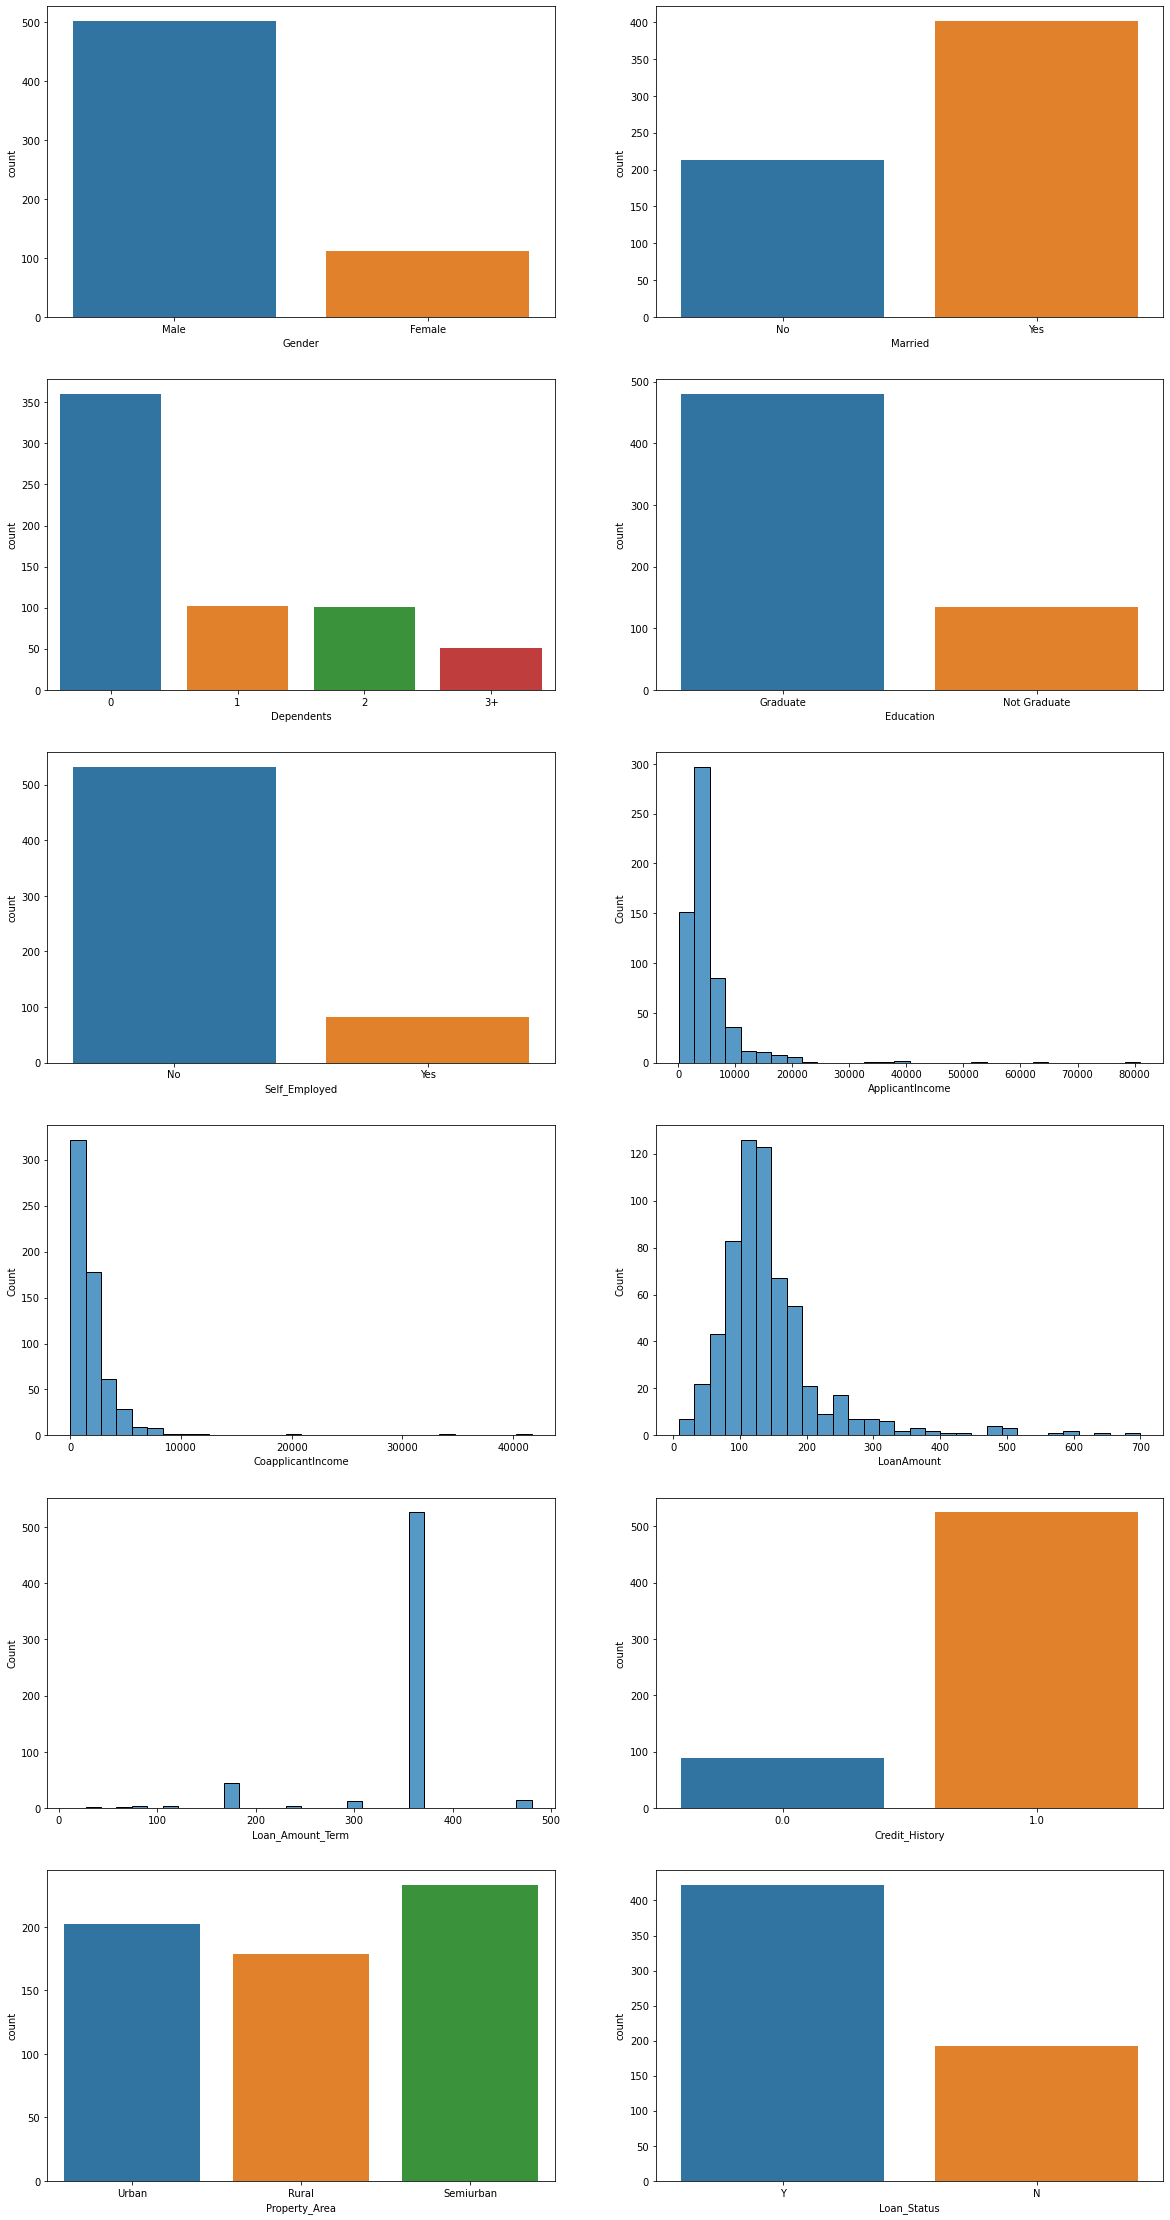

In [11]:
# Univariate Analysis 
j=1
plt.figure(figsize=(20,40))
for i in df:
    if(df[i].nunique()<10):
        plt.subplot(6,2,j)
        sns.countplot(data=df,x=i)
        j=j+1
    else:
        plt.subplot(6,2,j)
        sns.histplot(data=df,x=i,bins=30)
        j=j+1
plt.show()

### Bivariate Analysis

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

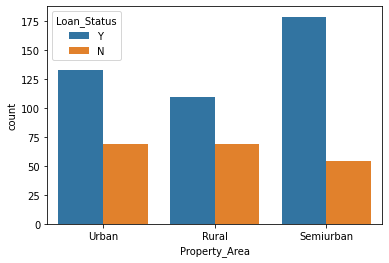

In [12]:
sns.countplot(data=df,x="Property_Area",hue="Loan_Status")
## Inference--
    # Chances of granting loan in Semiurban area is less than as compared to other two areas. 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

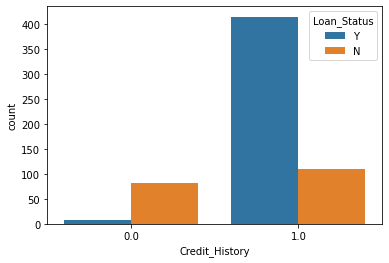

In [13]:
sns.countplot(data=df,x="Credit_History",hue="Loan_Status")
# Inference--
    # There are very less chances of geeting loan without credit history 

<AxesSubplot:xlabel='Gender', ylabel='count'>

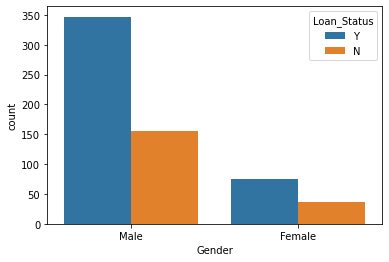

In [14]:
sns.countplot(data=df,x="Gender",hue="Loan_Status")
## Inferenc--
    # Majority of Male are geeting Loan 

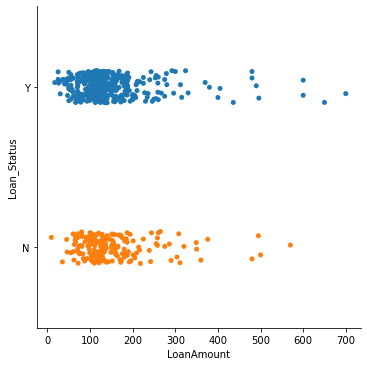

In [15]:
sns.catplot(data=df,x="LoanAmount",y="Loan_Status")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

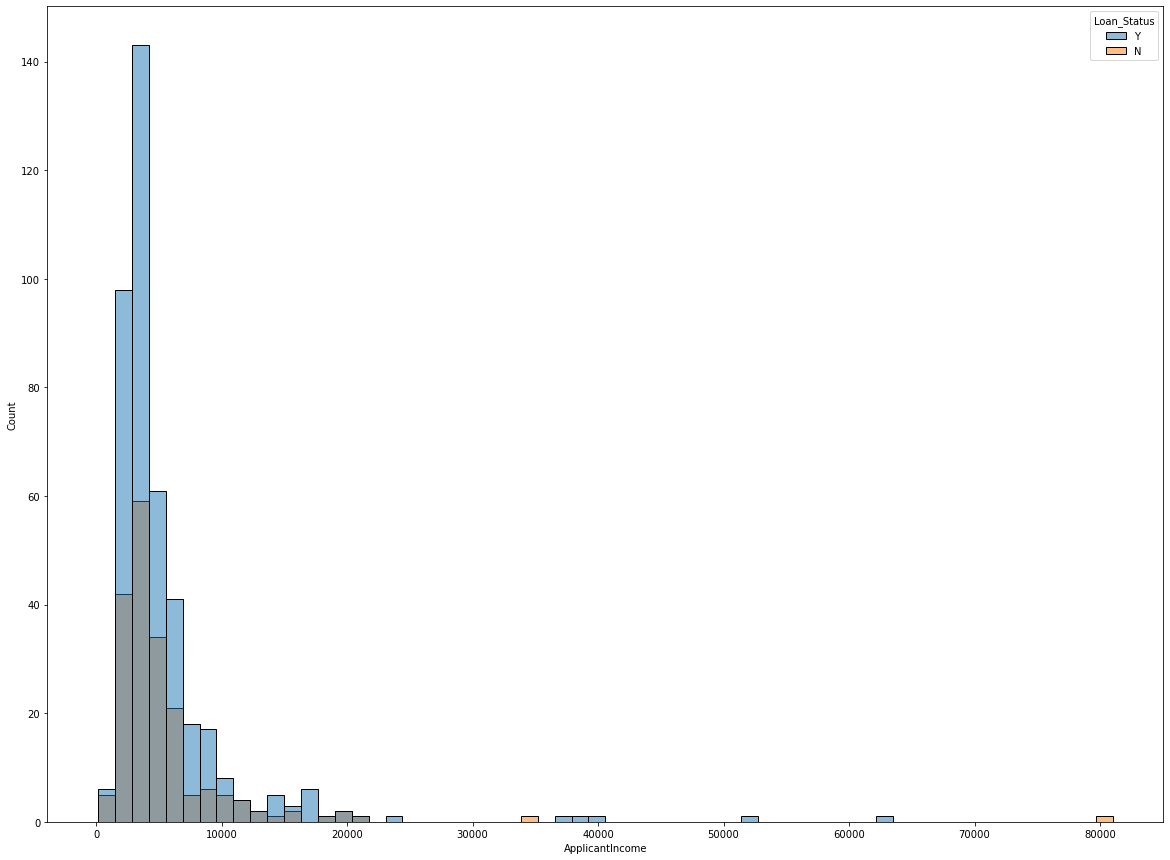

In [16]:
plt.figure(figsize=(20,15))
sns.histplot(data=df,x="ApplicantIncome",hue="Loan_Status",bins=60)

In [17]:
# will do LabelEncoding on the variable which have data type as  object .
for i in df:
    if(df.dtypes[i]=="object"):
        df[i]=le.fit_transform(df[i])
    else:
        df[i]=df[i]

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<AxesSubplot:>

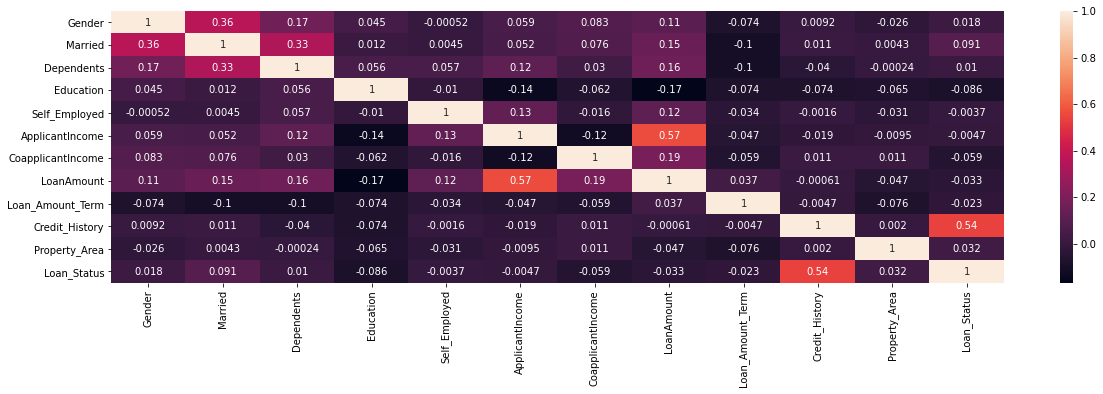

In [19]:
# Checking coorelation  between features . 
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)
## Inference--
    #1. There is NO multicorelation between features. 
    #2. Credit History is having much higher effect as compared to other independents variables on the target feature

## Train test split

In [20]:
y = df["Loan_Status"]
x = df.drop("Loan_Status",axis=1)
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

Gender


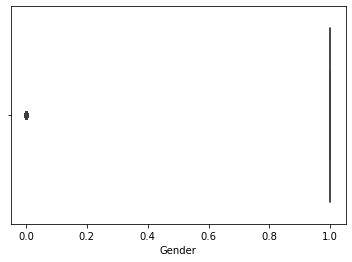

Married


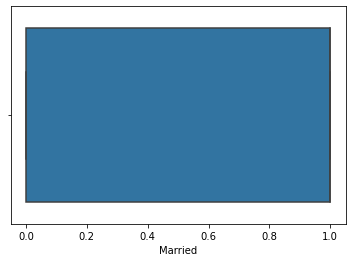

Dependents


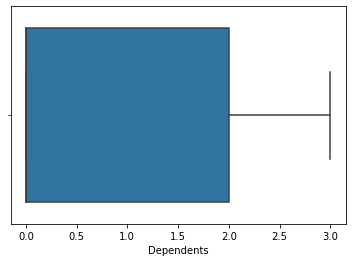

Education


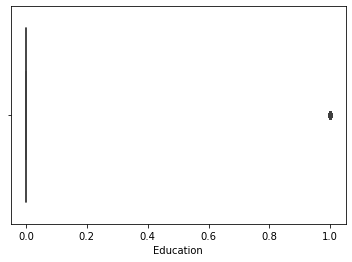

Self_Employed


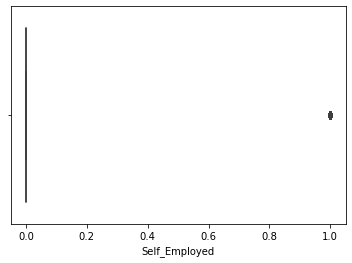

ApplicantIncome


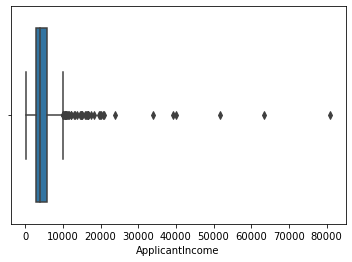

CoapplicantIncome


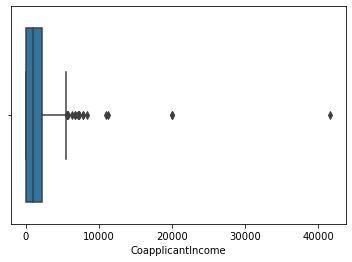

LoanAmount


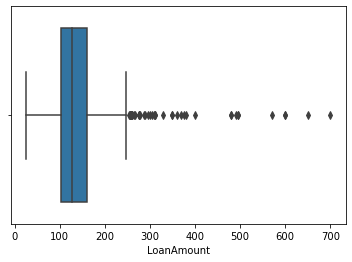

Loan_Amount_Term


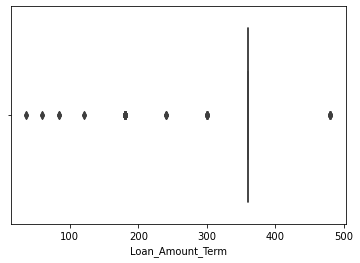

Credit_History


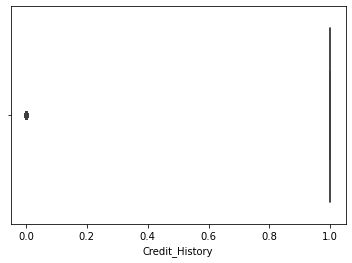

Property_Area


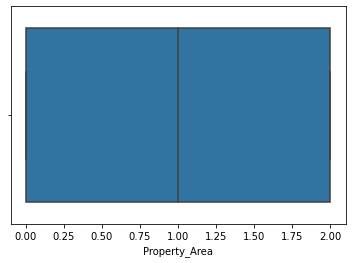

In [21]:
# checkig outliers in train data 
for i in x_train:
    print(i)
    sns.boxplot(data=x_train,x=i)
    plt.show()
## Inference-
    #LoanAmount ,CoapplicantIncome adn ApplicantIncome contain outliers

In [22]:
# Finding IQR , upper limit and lower limit of the columns which contain outliers. .
outliers = ["LoanAmount","CoapplicantIncome","ApplicantIncome"]
IQR_of_outliers = []
upper_limit_outlier=[]
lower_limit_outlier=[]

for i in outliers:
    Q1 = np.percentile(x_train[i],25)
    Q3 = np.percentile(x_train[i],75)
    IQR = Q3-Q1
    print("The IQR of",i,"is",IQR)
    IQR_of_outliers.append(IQR)
    
    upper_limit = Q3 +1.5*IQR
    print("The upper limit of",i,"is",upper_limit)
    upper_limit_outlier.append(upper_limit)
    
    lower_limit = Q1 - 1.5*IQR
    print("The lower limit of",i,"is",lower_limit)
    lower_limit_outlier.append(lower_limit)

The IQR of LoanAmount is 59.25
The upper limit of LoanAmount is 249.875
The lower limit of LoanAmount is 12.875
The IQR of CoapplicantIncome is 2202.5
The upper limit of CoapplicantIncome is 5506.25
The lower limit of CoapplicantIncome is -3303.75
The IQR of ApplicantIncome is 2826.0
The upper limit of ApplicantIncome is 9993.5
The lower limit of ApplicantIncome is -1310.5


In [23]:
# Removing Outlier- 
for i ,u , l in zip(outliers,upper_limit_outlier,lower_limit_outlier):
    x_train[i] = np.where(x_train[i]>u,u,np.where(x_train[i]<l,l,x_train[i]))

Gender


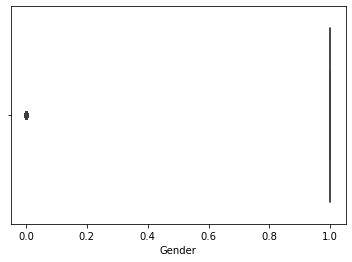

Married


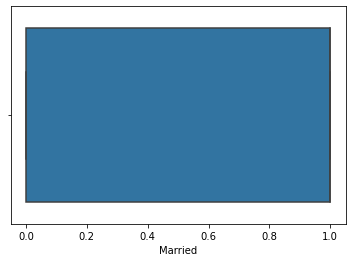

Dependents


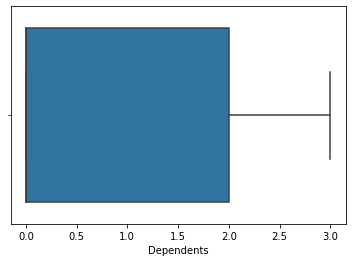

Education


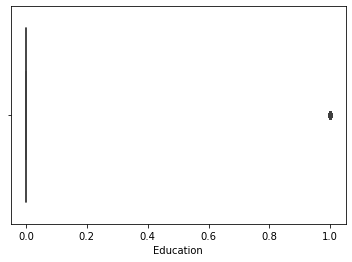

Self_Employed


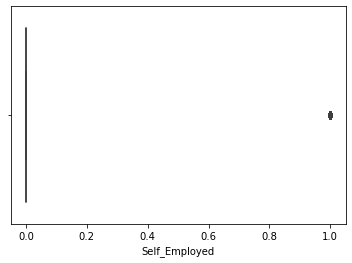

ApplicantIncome


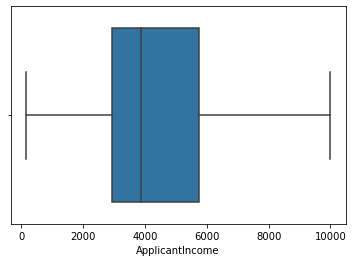

CoapplicantIncome


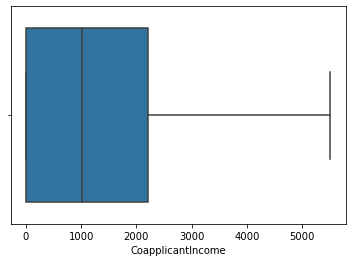

LoanAmount


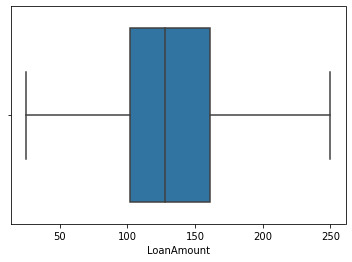

Loan_Amount_Term


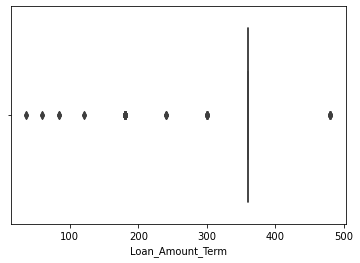

Credit_History


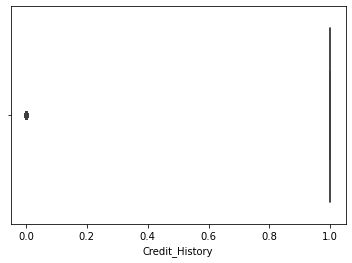

Property_Area


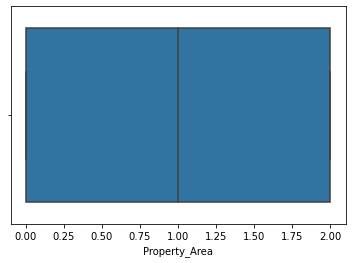

In [24]:
# checking if outliers are removed from train data set or not . 
for i in x_train:
    print(i)
    sns.boxplot(data=x_train,x=i)
    plt.show()

###  Logistic Regression

In [25]:
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
lr.predict(x_test)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [27]:
print("The accuracy through Logistic Regression model is",accuracy_score(y_test,lr.predict(x_test)))
print("The precision_score is ",precision_score(y_test,lr.predict(x_test)))
print("The recall score is",recall_score(y_test,lr.predict(x_test)))

The accuracy through Logistic Regression model is 0.8441558441558441
The precision_score is  0.84251968503937
The recall score is 0.963963963963964


## Decision Tree

In [28]:
dtc.fit(x_train,y_train)
dtc.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [29]:
print("The accuracy through Decision Tree is",accuracy_score(y_test,dtc.predict(x_test)))
print("The precision_score is ",precision_score(y_test,dtc.predict(x_test)))
print("The recall score is",recall_score(y_test,dtc.predict(x_test)))

The accuracy through Decision Tree is 0.7077922077922078
The precision_score is  0.83
The recall score is 0.7477477477477478


## Random Forest

In [30]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
rfc.predict(x_test)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [32]:
print("The accuracy through Random forest is",accuracy_score(y_test,rfc.predict(x_test)))
print("The precision_score is ",precision_score(y_test,rfc.predict(x_test)))
print("The recall score is",recall_score(y_test,rfc.predict(x_test)))

The accuracy through Random forest is 0.7857142857142857
The precision_score is  0.819672131147541
The recall score is 0.9009009009009009


###  Scaling - Using -Standardscaler

In [33]:
ss.fit(x_train)
scaler_x_train = ss.fit_transform(x_train)
scaler_x_test = ss.fit_transform(x_test)

In [34]:
scaler_x_train = pd.DataFrame(scaler_x_train,columns=x_train.columns)
scaler_x_test = pd.DataFrame(scaler_x_test,columns=x_test.columns)

In [35]:
scaler_x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.465759,0.692170,0.206312,-0.533775,-0.409283,0.411030,-0.857242,-1.703072,0.277782,0.416497,1.201865
1,0.465759,-1.444731,-0.772077,-0.533775,-0.409283,-0.739247,0.316020,-0.196570,0.277782,0.416497,-1.316850
2,0.465759,-1.444731,1.184702,-0.533775,-0.409283,0.363238,2.079388,0.464821,0.277782,0.416497,-1.316850
3,-2.147034,-1.444731,-0.772077,-0.533775,-0.409283,0.554406,-0.857242,0.354589,0.277782,0.416497,1.201865
4,-2.147034,-1.444731,-0.772077,-0.533775,-0.409283,-1.156712,0.195345,-1.519353,0.277782,0.416497,1.201865


In [36]:
scaler_x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.491869,-1.185854,-0.638762,-0.512148,2.936835,0.505644,-0.575923,-0.793777,0.26104,0.39736,-0.016991
1,-2.033060,-1.185854,-0.638762,-0.512148,-0.340503,-0.171450,-0.575923,-0.416696,0.26104,0.39736,-0.016991
2,0.491869,0.843274,-0.638762,-0.512148,-0.340503,0.279867,0.674173,2.438347,0.26104,0.39736,1.291293
3,0.491869,0.843274,-0.638762,-0.512148,-0.340503,-0.147023,0.208507,-0.443630,0.26104,0.39736,1.291293
4,0.491869,0.843274,1.454202,-0.512148,-0.340503,-0.532409,-0.202431,-0.618703,0.26104,0.39736,-0.016991


### Logistic Regression

In [37]:
lr.fit(scaler_x_train,y_train)
lr.predict(scaler_x_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [38]:
print("The accuracy through Logistic Regression Model is",accuracy_score(y_test,lr.predict(scaler_x_test)))
print("The precision_score is ",precision_score(y_test,lr.predict(scaler_x_test)))
print("The recall score is",recall_score(y_test,lr.predict(scaler_x_test)))

## Inference- 
  # No major changes are observed

The accuracy through Logistic Regression Model is 0.8376623376623377
The precision_score is  0.8257575757575758
The recall score is 0.9819819819819819


### Decision Tree 

In [39]:
dtc.fit(scaler_x_train,y_train)
dtc.predict(scaler_x_test)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [40]:
print("The accuracy through Decision Tree is",accuracy_score(y_test,dtc.predict(scaler_x_test)))
print("The precision_score is ",precision_score(y_test,dtc.predict(scaler_x_test)))
print("The recall score is",recall_score(y_test,dtc.predict(scaler_x_test)))

## Inference- 
  # No major changes are observed

The accuracy through Decision Tree is 0.6623376623376623
The precision_score is  0.8041237113402062
The recall score is 0.7027027027027027


### Random Forest 

In [41]:
rfc.fit(scaler_x_train,y_train)
rfc.predict(scaler_x_test)

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [42]:
print("The accuracy through Random forest is",accuracy_score(y_test,rfc.predict(scaler_x_test)))
print("The precision_score is ",precision_score(y_test,rfc.predict(scaler_x_test)))
print("The recall score is",recall_score(y_test,rfc.predict(scaler_x_test)))

## Inference- 
  # No major changes are observed

The accuracy through Random forest is 0.8246753246753247
The precision_score is  0.8333333333333334
The recall score is 0.9459459459459459
